In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
os.chdir("/home/mario/Repository/Normal_Alzeihmer") 

In [4]:
df = pd.read_excel(os.path.join("data", "clinicaADNI.xlsx"))
df_ADNIMERGE = pd.read_csv(os.path.join("data", "ADNIMERGE_30Jul2024.csv"))


/tmp/ipykernel_94669/642515120.py:2: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ADNIMERGE = pd.read_csv(os.path.join("data", "ADNIMERGE_30Jul2024.csv"))


In [5]:
control_data = df[df["DX_bl"] == "CN"]


In [6]:
print(f"Total subjects in control group (DX_bl == 'CN'): {len(control_data)}")

Total subjects in control group (DX_bl == 'CN'): 536


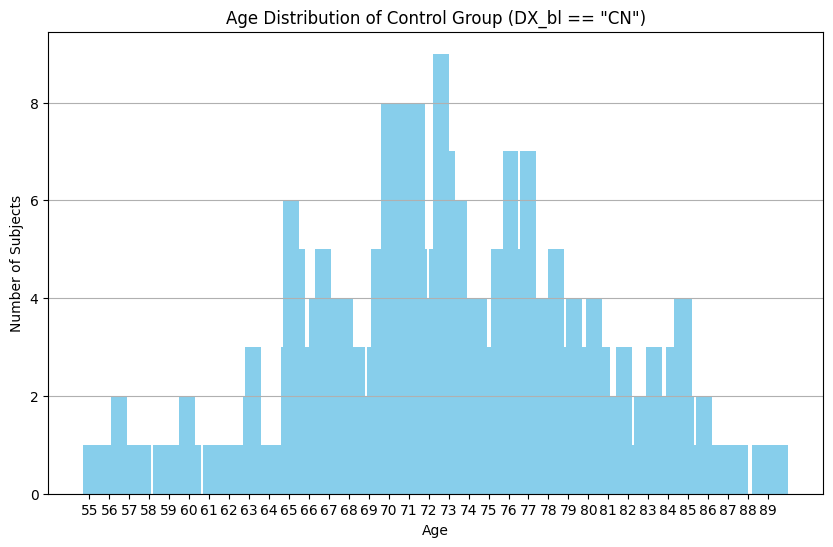

In [7]:
data_distribution = control_data["AGE"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(data_distribution.index, data_distribution.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Subjects')
plt.title('Age Distribution of Control Group (DX_bl == "CN")')
plt.xticks(range(int(control_data["AGE"].min()), int(control_data["AGE"].max()) + 1, 1))
plt.grid(axis='y')
plt.show()

In [ ]:
### seleziono solo i soggetti di controllo dal dataframe ADNIMERGE
adnimerge_control = df_ADNIMERGE[df_ADNIMERGE["DX"] == "CN"]
### seleziono solo quelle con scansione MRI disponibile basandomi sul campo FLDSTRENG diverso da NaN
adnimerge_control_mri = adnimerge_control[adnimerge_control["FLDSTRENG"].isna() == False]
### Andare a selezionare una scansione per soggetto, verificando il numero di soggetti unici

# adnimerge_control_mri = adnimerge_control_mri[adnimerge_control_mri["VISCODE"] == "bl"]
unique_subjects = adnimerge_control_mri["RID"].nunique()
print(f"Numero di soggetti unici: {unique_subjects}")
# seleziono la prima scansione disponibile per ogni soggetto
adnimerge_control_mri = adnimerge_control_mri.sort_values(by=["RID", "EXAMDATE"])
adnimerge_control_mri = adnimerge_control_mri.drop_duplicates(subset=["RID"], keep="first")
print(f"Total subjects in control group with MRI scans: {len(adnimerge_control_mri)}")


Numero di soggetti unici: 574
Total subjects in control group with MRI scans: 574


---

In [8]:
image_path = "/mnt/db_ext/ADNI_DB/NIFTI_CN/"


In [9]:
subjects = control_data["PTID"].to_list()

In [ ]:
path_subjects = []
missing_subjects = []
excluded_subjects = []
for subj in subjects:
    subj_dir = os.path.join(image_path, subj)
    if os.path.isdir(subj_dir):
        image_files = [fname for fname in os.listdir(subj_dir) if fname.endswith(".nii") or fname.endswith(".nii.gz")]
        num_images = len(image_files)
        print(f"Subject {subj}: {num_images} images found.")
        if num_images == 1:
            path_subjects.append(os.path.join(subj_dir, image_files[0]))
        elif num_images > 1:
            excluded_subjects.append(subj)
    else:
        missing_subjects.append(subj)

if missing_subjects:
    print(f"Warning: {len(missing_subjects)} subject directories not found. Examples: {missing_subjects[:10]}")
if excluded_subjects:
    print(f"Warning: {len(excluded_subjects)} subjects excluded due to having more than one image. Examples: {excluded_subjects[:10]}")
print(f"Total subjects with exactly one image found: {len(path_subjects)}")



Subject 011_S_0002: 1 images found.
Subject 011_S_0005: 1 images found.
Subject 022_S_0014: 1 images found.
Subject 100_S_0015: 1 images found.
Subject 011_S_0016: 1 images found.
Subject 011_S_0021: 1 images found.
Subject 011_S_0023: 1 images found.
Subject 100_S_0035: 1 images found.
Subject 099_S_0040: 1 images found.
Subject 018_S_0043: 1 images found.
Subject 100_S_0047: 1 images found.
Subject 067_S_0056: 1 images found.
Subject 023_S_0058: 1 images found.
Subject 067_S_0059: 1 images found.
Subject 023_S_0061: 1 images found.
Subject 010_S_0067: 1 images found.
Subject 007_S_0068: 1 images found.
Subject 007_S_0070: 1 images found.
Subject 123_S_0072: 1 images found.
Subject 027_S_0074: 1 images found.
Subject 023_S_0081: 1 images found.
Subject 136_S_0086: 1 images found.
Subject 073_S_0089: 1 images found.
Subject 099_S_0090: 1 images found.
Subject 022_S_0096: 1 images found.
Subject 020_S_0097: 1 images found.
Subject 123_S_0106: 1 images found.
Subject 123_S_0113: 1 images

In [19]:
df = pd.DataFrame(path_subjects, columns=["image_path"])

##aggiungere colonna output creata come path_subjects
df["output_path"] = df["image_path"].apply(lambda x: f"{os.path.dirname(x)}/processed/freesurfer8")
df["PTID"] = df["image_path"].apply(lambda x: os.path.basename(os.path.dirname(x)))

In [20]:
df.to_csv("data/control_adni_to_process.csv", index=False)